In [287]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import time as time
from google.colab import drive
#Carregando dados
dados = pd.read_csv('https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv')
# verificando as dimensões do DataFrame

#print("Variáveis:\t{}\nEntradas:\t{}".format(dados.shape[1], dados.shape[0]))
#print(dados.info())
#display(dados.head(5))
def get_digits(str1):
    c = ""
    for i in str1:
        if i.isdigit():
            c += i
    return c

dados['num_caps'] = dados.apply(lambda row: int((row['descricao'].split('|')[0]).replace('CAP','')), axis=1)
dados['criado_ano'] = dados.apply(lambda row: datetime.fromisoformat(row['criado']).date().year, axis=1)
dados['criado_mes'] = dados.apply(lambda row: datetime.fromisoformat(row['criado']).date().month, axis=1)
#dados['criado_tmp'] = dados.apply(lambda row: time.mktime(datetime.fromisoformat(row['criado']).date().timetuple()), axis=1)
#dados['criado_tmp'] = dados.apply(lambda row: datetime.strftime(row['criado'],'%Y-%m-%d').date().timestamp(), axis=1)
dados['elementos'] = dados['descricao'].map(lambda row: row.split('|')[1])
elementos = np.concatenate(dados['elementos'].map(lambda row: row.split(';')),axis=0)
#quantidades = []
#quantidades.append(list(map(lambda x: get_digits(x[x.rfind(' '):len(x)]),elementos)))
elem_principais = []
elem_principais.append(list(map(lambda x: x[:x.rfind(' ')].strip(),elementos)))

#print(elem_principais)
#print(quantidades)

elements_uniques = np.unique(elem_principais[0])
for element in elements_uniques:
  coluna = str(element)
  #print(coluna)
  dados[coluna] = dados['elementos'].apply(lambda x: ((0, get_digits(x[x.rfind(' '):len(x)])) [x.find(element) == True]))



display(dados.info())
#display(dados.describe)
#display(dados.head())

#drive.mount ('/drive')
#dados.to_excel('/drive/MyDrive/Colab Notebooks/desafio/desafio_manipulae.xlsx')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Columns: 1651 entries, descricao to ZOLPIDEM HEMITARTARATO
dtypes: float64(2), int64(503), object(1146)
memory usage: 89.7+ MB


None

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = dados.drop(['correto','descricao','elementos','criado'],axis=1)
y = dados['correto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#print('Dados train: ', X_train.shape)
print('Dados test:  ', X_test.shape)

#fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
#fs.fit(X, y)
#fs.fit(X_train, y_train)
# transform train input data
#X_train_fs = fs.transform(X_train)

Dados test:   (2137, 1647)


Teste com Random Forest

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

regr = RandomForestRegressor()
regr.fit(X_train,y_train)

#cv = KFold(n_splits=10, random_state=1, shuffle=True)
#scores = cross_val_score(regr, X_fs, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#print("Resultado Random Forest")
#print("Erros médios padrão: ", scores)
#print("Erro médio padrão: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

predictions = regr.predict(X_test)# Performance metrics
errors = abs(predictions - y_test)
print('Erro médio absoluto:', round(np.mean(errors), 2), ' reais.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Acurácia:', round(accuracy, 2), '%.')


Erro médio absoluto: 9.76  reais.
Acurácia: 93.84 %.


Teste com Rede Neural

In [290]:
'''from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler().fit_transform(X_fs)

mlp = MLPRegressor()
scores = cross_val_score(mlp, X_standardized, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("Resultado Redes Neurais")
print("Erros médios padrão: ", scores)
print("Erro médio padrão: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))'''



'from sklearn.neural_network import MLPRegressor\nfrom sklearn.preprocessing import StandardScaler\n\nX_standardized = StandardScaler().fit_transform(X_fs)\n\nmlp = MLPRegressor()\nscores = cross_val_score(mlp, X_standardized, y, scoring=\'neg_mean_absolute_error\', cv=cv, n_jobs=-1)\nprint("Resultado Redes Neurais")\nprint("Erros médios padrão: ", scores)\nprint("Erro médio padrão: %0.2f com desvio padrão de %0.2f" % (scores.mean(), scores.std()))'

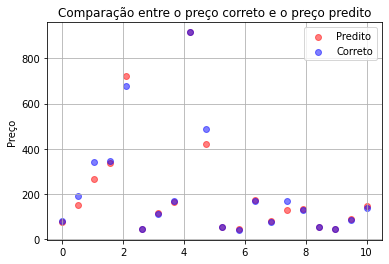

In [291]:
#Importando o pyplot
from matplotlib import pyplot as plt
# Pegando somente os 20 primeiros registros senão o gráfico fica incompreensível
# 20 valores no intervalo de 0 a 10
#x = np.linspace(0, 50, num=2137)
x = np.linspace(0, 10, num=20)

# define a legenda e tamanho de linhas
#plt.plot(x, predictions[:50], label='predito',color='red', marker='o')
#plt.plot(x, y_test[:50], label='correto', color='blue', marker='o')
plt.scatter(x, predictions[:20], marker='o',label='Predito',color='red',alpha=0.5);
plt.scatter(x, y_test[:20], marker='o',label='Correto',color='blue',alpha=0.5);

#plt.xlabel('Num Capsulas')
plt.ylabel('Preço')
plt.title("Comparação entre o preço correto e o preço predito")
# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

# Configurações do texto
#plt.text(1.00, 1.0, "Comparação entre o valor correto e o valor predito", fontsize=8, horizontalalignment='left')
plt.grid(True)
plt.show()